<a href="https://colab.research.google.com/github/Daniel-Benson-Poe/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Daniel_Benson_LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [0]:
# Imports.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# use the 'magic' symbol (%) to specify some non-python code (i.e., affects the underlying jupyter kernel).
%matplotlib inline
'''
That line is only for jupyter notebooks, and allows plt figures to show up in your noteboook.
if you are using another editor, you'll use: 
 plt.show() 
at the end of all your plotting commands to have the figure pop up in another window.
''' 

"\nThat line is only for jupyter notebooks, and allows plt figures to show up in your noteboook.\nif you are using another editor, you'll use: \n plt.show() \nat the end of all your plotting commands to have the figure pop up in another window.\n"

In [0]:
# Specify the plot style we want to use with pandas and matplotlib
plt.style.use('fast')
# fast is default

In [7]:
# List of other available plot styles
plt.style.available

['seaborn-pastel',
 'dark_background',
 'seaborn-dark-palette',
 'seaborn-deep',
 'ggplot',
 'bmh',
 'seaborn-muted',
 'seaborn-talk',
 'seaborn-white',
 'seaborn',
 'seaborn-ticks',
 'seaborn-colorblind',
 'fast',
 'seaborn-notebook',
 'Solarize_Light2',
 'tableau-colorblind10',
 'fivethirtyeight',
 'seaborn-poster',
 'classic',
 'seaborn-bright',
 'seaborn-paper',
 'seaborn-dark',
 'grayscale',
 '_classic_test',
 'seaborn-darkgrid',
 'seaborn-whitegrid']

Part 1: Pandas built-in visualization tool

In [9]:
# Read in the titanic dataset
# url = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'
url = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'
df = pd.read_csv(url)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [10]:
# Cabin class is categorical variable
# Can be displayed using number or string 
df['cabin_class'] = df['Pclass'].map({1:'first', 2:'second', 3:'third'})
df[['cabin_class', 'Pclass']].head()

,cabin_class,Pclass
0,third,3
1,first,1
2,third,3
3,first,1
4,third,3


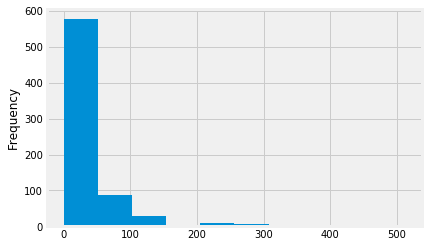

In [11]:
# Fare is a continuous variable so we can display it with a histogram
df['Fare'].plot(kind='hist');

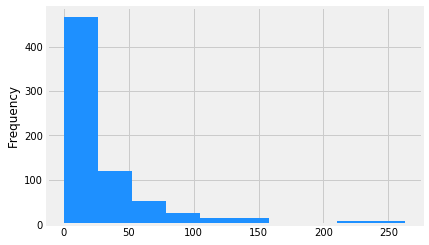

In [12]:
# Remove two extreme outliers
df = df[df['Fare']<500]
df['Fare'].plot(kind='hist', color='dodgerblue');

In [0]:
# A continuous variable can be converted to a categorical var using binning
farebins = [0, 8, 15, 33, 512]
farelabels = ['low', 'med', 'high', 'vhigh']

df['fare_groups'] = pd.cut(df['Fare'],
                           bins=farebins,
                           labels=farelabels)

In [14]:
# Now check
myresults = df['fare_groups'].value_counts().sort_index()
myresults

low      154
med      189
high     185
vhigh    174
Name: fare_groups, dtype: int64

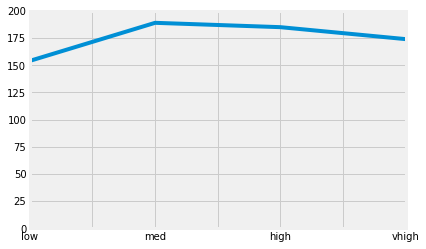

In [15]:
# It's sometimes important to specify the range of your y-axis to get more accurate results
myresults.plot(ylim=(0,200));

Display single continuous variable

In [16]:
df.shape

(709, 8)

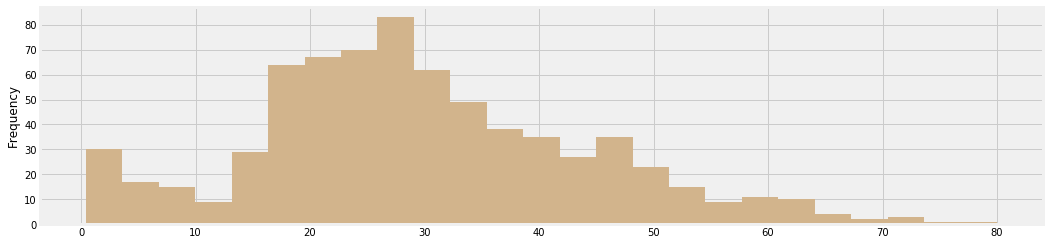

In [18]:
# Histogram
df['Age'].plot(kind='hist', bins=25, figsize=(16, 4), color='tan');

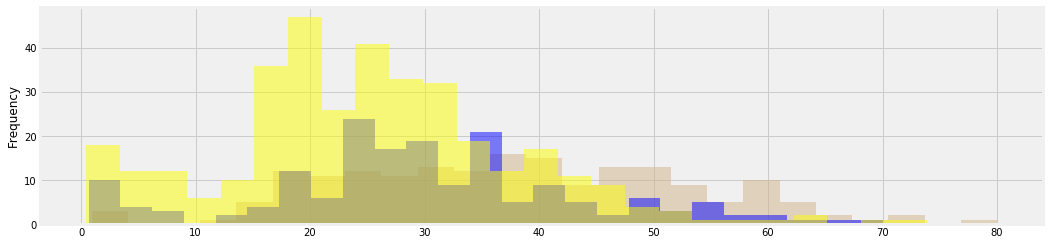

In [19]:
#Stacked histo or continuous var, broken out by categorical variable
df[df['cabin_class']=='first']['Age'].plot(kind='hist', bins=25, figsize=(16,4), color='tan', alpha=0.5);
df[df['cabin_class']=='second']['Age'].plot(kind='hist', bins=25, figsize=(16,4), color='blue', alpha=0.5);
df[df['cabin_class']=='third']['Age'].plot(kind='hist', bins=25, figsize=(16,4), color='yellow', alpha=0.5);

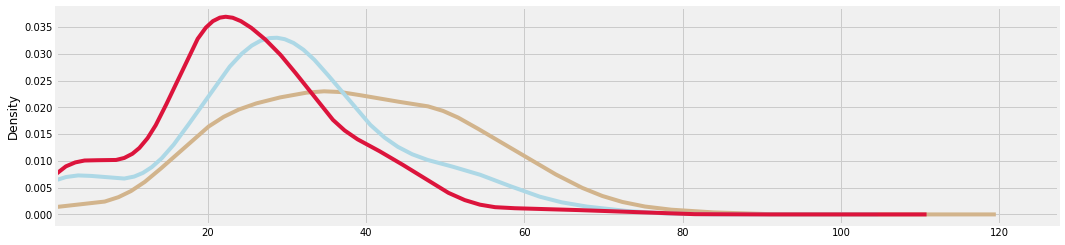

In [20]:
# This is easier to read using Kernel Density Estimate, however
df[df['cabin_class']=='first']['Age'].plot(kind='density', xlim=(0.85), figsize=(16,4), color='tan');
df[df['cabin_class']=='second']['Age'].plot(kind='density', xlim=(0.85), figsize=(16,4), color='lightblue');
df[df['cabin_class']=='third']['Age'].plot(kind='density', xlim=(0.85), figsize=(16,4), color='crimson');

Display single categorical variable

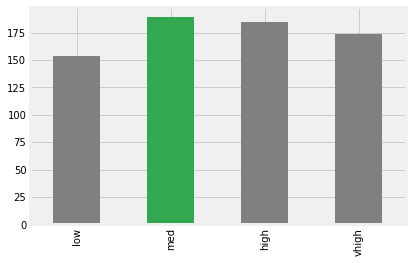

In [21]:
# Bar chart. Use colors to make particular value 'pop'
myresults = df['fare_groups'].value_counts().sort_index()
myresults.plot(kind='bar', color=['gray', '#32a852', 'gray', 'gray']);

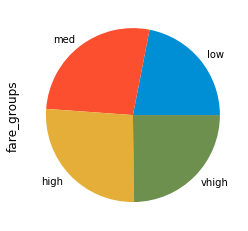

In [22]:
# Pie chare...Gross!
myresults.plot(kind='pie')

Compare two categorical variables

In [23]:
# Compare two categorical variables using crosstab
cab_death = pd.crosstab(df['cabin_class'], df['Survived'])
cab_death

Survived,0,1
cabin_class,,
first,64,117
second,90,83
third,270,85


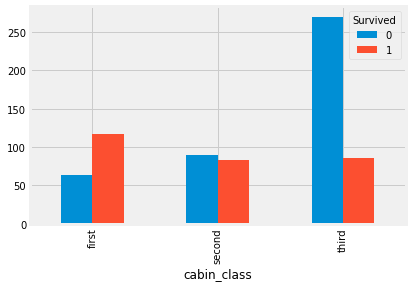

In [25]:
# Make that into bar chart
cab_death.plot(kind='bar');

In [26]:
# Crosstab with column percents
cab_death1 = pd.crosstab(df['cabin_class'], df['Survived'], normalize='columns')
cab_death1

Survived,0,1
cabin_class,,
first,0.150943,0.410526
second,0.212264,0.291228
third,0.636792,0.298246


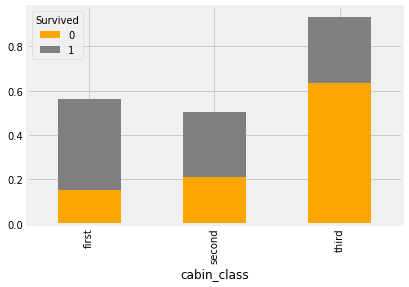

In [27]:
# Make stacked bar chart; easy comparison of two categorical variables
cab_death1.plot(kind='bar', stacked=True, color=['orange', 'gray']);

In [28]:
# Crosstab with row percents
cab_death2 = pd.crosstab(df['cabin_class'], df['Survived'], normalize='index')
cab_death2

Survived,0,1
cabin_class,,
first,0.353591,0.646409
second,0.520231,0.479769
third,0.760563,0.239437


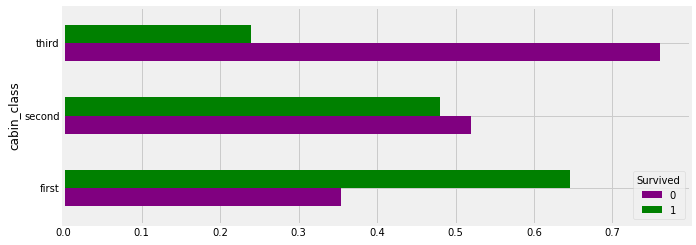

In [30]:
# Paired bar chart for comparison of two categorical variables.
cab_death2.plot(kind='barh', figsize=(10,4), color=['purple', 'green']);

Compare categorical and continuous

In [31]:
# Look at a single continuous var
df['Age'].mean() 

29.618011283497882

In [32]:
  # Explore that continuous variable broken out by categorical variable
  cab_age = df.groupby('cabin_class')['Age'].mean()
  cab_age

cabin_class
first     38.151492
second    29.877630
third     25.140620
Name: Age, dtype: float64

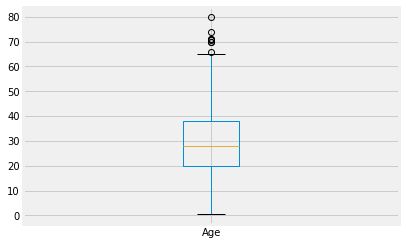

In [34]:
# To visualize single continuous variable, use plot with kind=box
df['Age'].plot(kind='box');

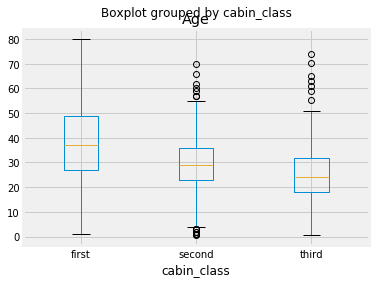

In [35]:
# To break out a continuous variable by categorical variable, use boxplot
df.boxplot(column='Age', by='cabin_class');

Compare two or three continuous vars

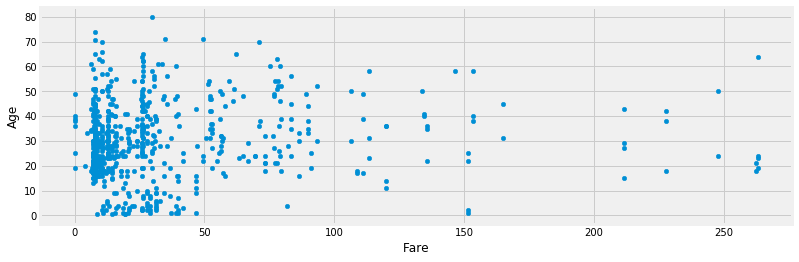

In [36]:
# Two continuous vars
df.plot(kind='scatter', x='Fare', y='Age', figsize=(12, 4));

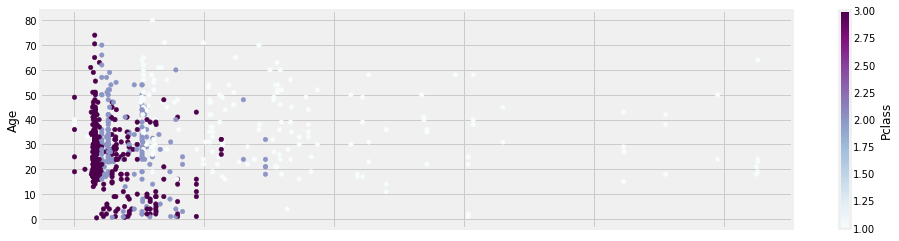

In [37]:
# Three vars
df.plot(kind='scatter', x='Fare', y='Age', c='Pclass', colormap='BuPu', figsize=(15, 4));

Use a line plot to examine two continuous vars 

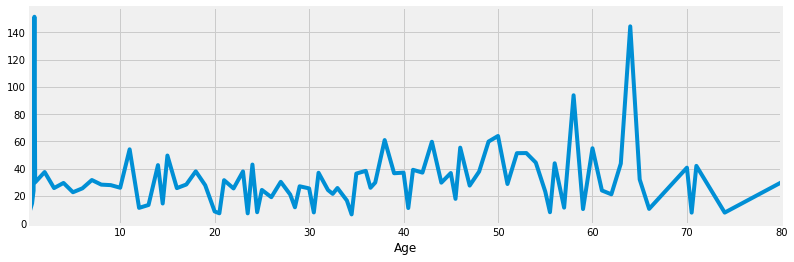

In [38]:
# Line chart: age by fare 
df.groupby('Age')['Fare'].mean().plot(figsize=(12, 4), kind='line');

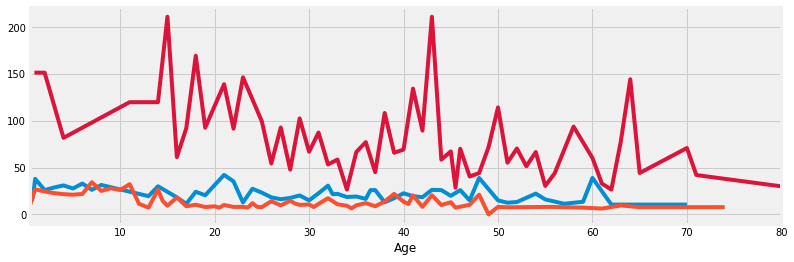

In [39]:
# Line chart: age by fare and cabinclass
df[df['cabin_class']=='first'].groupby('Age')['Fare'].mean().plot(figsize=(12, 4), color='crimson');
df[df['cabin_class']=='second'].groupby('Age')['Fare'].mean().plot(figsize=(12, 4));
df[df['cabin_class']=='third'].groupby('Age')['Fare'].mean().plot(figsize=(12, 4));

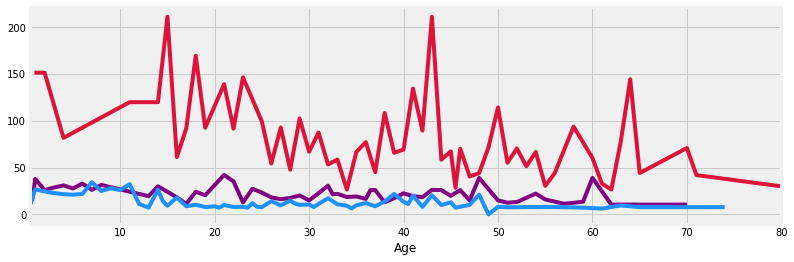

In [40]:
# This can be done more elegantly with lists
mycolors = ['crimson', 'purple', 'dodgerblue']
cab_classes = ['first', 'second', 'third']
# Instead of specifying 3 plots, you can loop through the values
for x in [0, 1, 2]:
  df[df['cabin_class']==cab_classes[x]].groupby('Age')['Fare'].mean().plot(figsize=(12, 4), color=mycolors[x]);


Comparing multiple continuous variables

In [41]:
# Correlation Matrix
corr_matrix = df.corr()
corr_matrix

,Survived,Pclass,Age,Fare
Survived,1.000000,-0.351579,-0.084756,0.272376
Pclass,-0.351579,1.000000,-0.365259,-0.616062
Age,-0.084756,-0.365259,1.000000,0.096573
Fare,0.272376,-0.616062,0.096573,1.000000


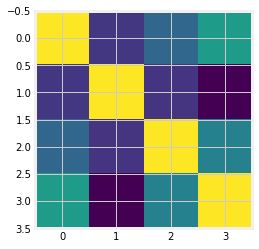

In [42]:
# Display correlation matrix as heatmap
plt.imshow(corr_matrix);

Easier and better looking usijng seaborn

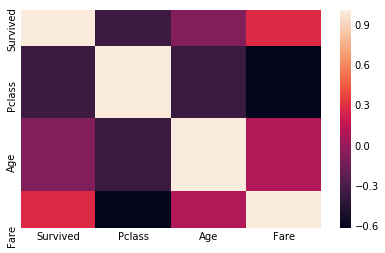

In [43]:
# Seaborn
sns.heatmap(corr_matrix);

Intro to Matplotlib

In [44]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

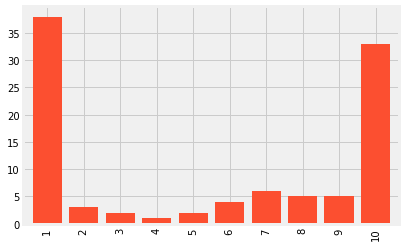

In [46]:
# Data to replicate figure
mydata = pd.Series([38, 3, 2, 1, 3, 4, 5, 5, 5, 32],
                   index=range(1,11))
fake.plot.bar(color='C1', width=0.8);

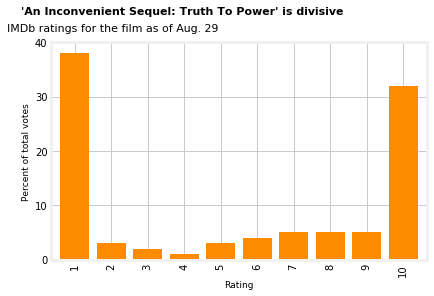

In [52]:
fig, ax = plt.subplots()
fig.patch.set(facecolor='white')

mydata.plot.bar(width=0.8, color='darkorange')

ax.set (facecolor='white')

ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive",
             fontsize=11,
             x=.35,
             y=1.1,
             fontweight='bold')
ax.text(s="IMDb ratings for the film as of Aug. 29",
          fontsize=11,
          x=-1.85,
          y=42);

ax.set_xlabel('Rating', fontsize=9)
ax.set_ylabel("Percent of total votes", fontsize=9)
ax.set_xticklabels(range(1,11))
ax.set_yticklabels(range(0,50,10))
ax.set_yticks(range(0,50,10));


In [0]:
# Read in the data for 'When Does Praying in Public Make Others Uncomfortable?'
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/religion-survey/religion-survey-results.csv')

In [57]:
# Look at the shape and first five rows
print(df.shape)
df.head()

(1040, 48)


,"What is your present religion, if any?",Unnamed: 1,Do you consider yourself to be an evangelical?,Do you attend religious services,"How often do you: Pray in public with visible motions (sign of the cross, bowing, prostration, shokeling, etc)","How often do you: Pray in public using some kind of physical object (rosary, tefillin, etc)",How often do you: Pray aloud before meals in the presence of people who don't belong to your religion,How often do you: Tell someone you'll pray for him or her,How often do you: Ask or offer to pray with someone,"How often do you: Bring up your religion, unprompted, in conversation","How often do you: Ask others about their religion, unprompted, in conversation","How often do you: Decline some kind of food or beverage for religious reasons (kosher, halal, fasting rules, etc)","How often do you: Wear religious clothing/jewelry (hijab, kippah, wig, kara, turban, cross, etc)","How often do you: Participate in a public religious event on the streets (Corpus Christi procession, inauguration of Torah scrolls, etc)","How comfortable do you feel when you: Pray in public with visible motions (sign of the cross, bowing, prostration, shokeling, etc)","How comfortable do you feel when you: Pray in public using some kind of physical object (rosary, tefillin, etc)",How comfortable do you feel when you: Pray aloud before meals in the presence of people who don't belong to your religion,How comfortable do you feel when you: Tell someone you'll pray for him or her,How comfortable do you feel when you: Ask or offer to pray with someone,"How comfortable do you feel when you: Bring up your religion, unprompted, in conversation","How comfortable do you feel when you: Ask others about their religion, unprompted, in conversation","How comfortable do you feel when you: Decline some kind of food or beverage for religious reasons (kosher, halal, fasting rules, etc)","How comfortable do you feel when you: Wear religious clothing/jewelry (hijab, kippah, wig, kara, turban, cross, etc)","How comfortable do you feel when you: Participate in a public religious event on the streets (Corpus Christi procession, inauguration of Torah scrolls, etc)","How comfortable do you think someone outside your religion would be if they saw you: Pray in public with visible motions (sign of the cross, bowing, prostration, shokeling, etc)","How comfortable do you think someone outside your religion would be if they saw you: Pray in public using some kind of physical object (rosary, tefillin, etc)",How comfortable do you think someone outside your religion would be if they saw you: Pray aloud before meals in the presence of people who don't belong to your religion,How comfortable do you think someone outside your religion would be if they saw you: Tell someone you'll pray for him or her,How comfortable do you think someone outside your religion would be if they saw you: Ask or offer to pray with someone,"How comfortable do you think someone outside your religion would be if they saw you: Bring up your religion, unprompted, in conversation","How comfortable do you think someone outside your religion would be if they saw you: Ask others about their religion, unprompted, in conversation","How comfortable do you think someone outside your religion would be if they saw you: Decline some kind of food or beverage for religious reasons (kosher, halal, fasting rules, etc)","How comfortable do you think someone outside your religion would be if they saw you: Wear religious clothing/jewelry (hijab, kippah, wig, kara, turban, cross, etc)","How comfortable do you think someone outside your religion would be if they saw you: Participate in a public religious event on the streets (Corpus Christi procession, inauguration of Torah scrolls, etc)","How comfortable would you be seeing someone who practices a different religion from you: Pray in public with visible motions (sign of the cross, bowing, prostration, shokeling, etc)","How comfortable would you be seein

In [0]:
# Let's look at the columns
df.columns

In [0]:
# From this list, we will need the following columns:
# 'How comfortable do you feel when you: Pray in public using some kind of physical object (rosary, tefillin, etc)',
# 'How comfortable would you be seeing someone who practices a different religion from you: Ask or offer to pray with you',

In [0]:
# We also need the following from 'What is your present religion, if any?':
# Christian
# Atheist/Agnostic

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here